In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
traindata = pd.read_csv('train_LZV4RXX.csv')
testdata = pd.read_csv('test_4zJg83n.csv')

In [3]:
traindata.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [4]:
testdata.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [5]:
print('For Training')
print('We have {} rows.'.format(traindata.shape[0]))
print('We have {} columns'.format(traindata.shape[1]))

For Training
We have 7000 rows.
We have 10 columns


In [6]:
print('For Testing')
print('We have {} rows.'.format(testdata.shape[0]))
print('We have {} columns'.format(testdata.shape[1]))

For Testing
We have 3000 rows.
We have 9 columns


In [7]:
np.sum(pd.isnull(traindata))

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [8]:
np.sum(pd.isnull(testdata))

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [9]:
traindata['education'].head()

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: education, dtype: float64

In [10]:
traindata['education'] = traindata['education'].fillna(traindata['education'].mean)
testdata['education'] = testdata['education'].fillna(testdata['education'].mean)

In [11]:
np.sum(pd.isnull(traindata))

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [12]:
np.sum(pd.isnull(testdata))

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64

<AxesSubplot:xlabel='no_of_curr_loans', ylabel='count'>

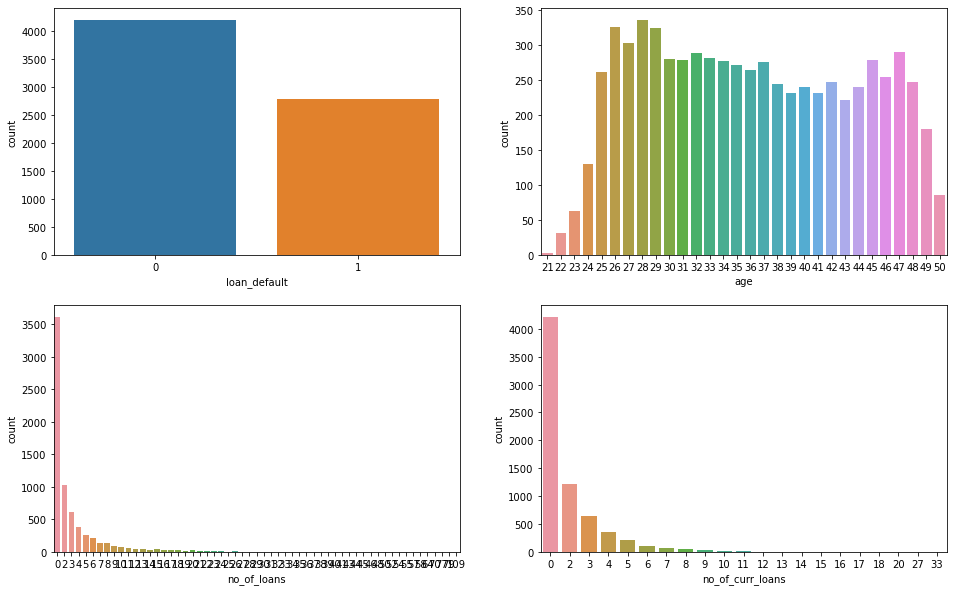

In [13]:
fig, ax = plt.subplots(2,2,figsize=(16,10))
sns.countplot('loan_default', data=traindata, ax=ax[0][0])
sns.countplot('age', data=traindata, ax=ax[0][1])
sns.countplot('no_of_loans', data=traindata, ax=ax[1][0])
sns.countplot('no_of_curr_loans', data=traindata, ax=ax[1][1])

In [14]:
data = pd.concat([traindata, testdata], ignore_index=True)
# data = traindata

In [15]:
data.drop('loan_id', axis=1, inplace=True)

In [16]:
data.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,Aadhar,504264,820920,2,2,0,0.0
1,48,1.0,Aadhar,728556,831444,6,2,0,0.0
2,30,2.0,VoterID,642936,826092,0,0,0,1.0
3,28,1.0,Aadhar,746556,930924,0,0,0,0.0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0.0


In [17]:
mode_val = data['loan_default'].mode()[0]
mode_val

0.0

In [18]:
data['loan_default'] = data['loan_default'].fillna(value = mode_val)

In [19]:
data['loan_default'] = data['loan_default'].astype(float).astype('Int64')

In [20]:
data.dtypes

age                  int64
education           object
proof_submitted     object
loan_amount          int64
asset_cost           int64
no_of_loans          int64
no_of_curr_loans     int64
last_delinq_none     int64
loan_default         Int64
dtype: object

In [21]:
data.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,Aadhar,504264,820920,2,2,0,0
1,48,1.0,Aadhar,728556,831444,6,2,0,0
2,30,2.0,VoterID,642936,826092,0,0,0,1
3,28,1.0,Aadhar,746556,930924,0,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [22]:
data.shape

(10000, 9)

In [23]:
data.describe()

,age,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,36.100900,6.632274e+05,9.145898e+05,2.843000,1.372100,0.013600,0.280000
std,7.551425,1.484078e+05,2.122862e+05,5.429374,2.198073,0.115829,0.449021
min,21.000000,1.678800e+05,4.706040e+05,0.000000,0.000000,0.000000,0.000000
25%,30.000000,5.793960e+05,7.959450e+05,0.000000,0.000000,0.000000,0.000000
50%,36.000000,6.559080e+05,8.580000e+05,0.000000,0.000000,0.000000,0.000000
75%,43.000000,7.352970e+05,9.552420e+05,3.000000,2.000000,0.000000,1.000000
max,50.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


In [24]:
np.sum(pd.isnull(data))

age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data.dtypes

age                  int64
education           object
proof_submitted     object
loan_amount          int64
asset_cost           int64
no_of_loans          int64
no_of_curr_loans     int64
last_delinq_none     int64
loan_default         Int64
dtype: object

In [27]:
np.sum(pd.isnull(data))

age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [28]:
data.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,Aadhar,504264,820920,2,2,0,0
1,48,1.0,Aadhar,728556,831444,6,2,0,0
2,30,2.0,VoterID,642936,826092,0,0,0,1
3,28,1.0,Aadhar,746556,930924,0,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [140]:
x = data.iloc[:, 0:-1]
x.shape

(10000, 8)

In [141]:
y = data.iloc[:,-1]
y.shape

(10000,)

In [142]:
x.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,1.0,Aadhar,504264,820920,2,2,0
1,48,1.0,Aadhar,728556,831444,6,2,0
2,30,2.0,VoterID,642936,826092,0,0,0
3,28,1.0,Aadhar,746556,930924,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0


In [143]:
cat_columns = x.select_dtypes(['object']).columns
cat_columns

Index(['education', 'proof_submitted'], dtype='object')

In [144]:
x[cat_columns] = x[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [145]:
x.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,0,0,504264,820920,2,2,0
1,48,0,0,728556,831444,6,2,0
2,30,1,1,642936,826092,0,0,0
3,28,0,0,746556,930924,0,0,0
4,29,0,0,1139880,1902000,0,0,0


In [146]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: loan_default, dtype: Int64

In [147]:
x.dtypes

age                 int64
education           int64
proof_submitted     int64
loan_amount         int64
asset_cost          int64
no_of_loans         int64
no_of_curr_loans    int64
last_delinq_none    int64
dtype: object

In [148]:
y.dtypes

Int64Dtype()

In [149]:
y=y.astype('int') 

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=.3, shuffle=False)

In [151]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7000, 8) (3000, 8) (7000,) (3000,)


In [152]:
X_train.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,0,0,504264,820920,2,2,0
1,48,0,0,728556,831444,6,2,0
2,30,1,1,642936,826092,0,0,0
3,28,0,0,746556,930924,0,0,0
4,29,0,0,1139880,1902000,0,0,0


In [153]:
X_test.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
7000,29,0,0,636936,768240,2,2,0
7001,28,0,0,548988,693060,3,3,0
7002,28,0,0,651756,936600,0,0,0
7003,45,1,0,614676,744840,4,3,0
7004,48,0,0,625236,839400,0,0,0


In [154]:
x.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,0,0,504264,820920,2,2,0
1,48,0,0,728556,831444,6,2,0
2,30,1,1,642936,826092,0,0,0
3,28,0,0,746556,930924,0,0,0
4,29,0,0,1139880,1902000,0,0,0


In [155]:
Y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: loan_default, dtype: int32

In [156]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: loan_default, dtype: int32

In [157]:
Y_test.head()

7000    0
7001    0
7002    0
7003    0
7004    0
Name: loan_default, dtype: int32

In [164]:
BernNB = BernoulliNB()
BernNB.fit(X_train,Y_train)
Y_bpred = BernNB.predict(X_test)

b_accuracy = accuracy_score(Y_test, Y_bpred)
print('Accuracy: %f' % b_accuracy)
b_precision = metrics.precision_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
print('Precision: %f' % b_precision)
b_recall = metrics.recall_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
print('Recall: %f' % b_recall)
b_f1 = metrics.f1_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
print('F1 score: %f' % b_f1)


Accuracy: 0.933667
Precision: 1.000000
Recall: 0.933667
F1 score: 0.965696


In [171]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
Y_rpred = RF.predict(X_test)

r_accuracy = accuracy_score(Y_test, Y_rpred)
print('Accuracy: %f' % r_accuracy)
r_precision = metrics.precision_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
print('Precision: %f' % r_precision)
r_recall = metrics.recall_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
print('Recall: %f' % r_recall)
r_f1 = metrics.f1_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
print('F1 score: %f' % r_f1)

Accuracy: 0.738667
Precision: 1.000000
Recall: 0.738667
F1 score: 0.849693


In [172]:
GausNB = GaussianNB()
GausNB.fit(X_train,Y_train)
Y_gpred = GausNB.predict(X_test)

g_accuracy = accuracy_score(Y_test, Y_gpred)
print('Accuracy: %f' % g_accuracy)
g_precision = metrics.precision_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
print('Precision: %f' % g_precision)
g_recall = metrics.recall_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
print('Recall: %f' % g_recall)
g_f1 = metrics.f1_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
print('F1 score: %f' % g_f1)

Accuracy: 0.899667
Precision: 1.000000
Recall: 0.899667
F1 score: 0.947184


In [173]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,Y_train)
Y_dpred = Dtree.predict(X_test)

d_accuracy = accuracy_score(Y_test, Y_dpred)
print('Accuracy: %f' % d_accuracy)
d_precision = metrics.precision_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
print('Precision: %f' % d_precision)
d_recall = metrics.recall_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
print('Recall: %f' % d_recall)
d_f1 = metrics.f1_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
print('F1 score: %f' % d_f1)

Accuracy: 0.593000
Precision: 1.000000
Recall: 0.593000
F1 score: 0.744507


In [175]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,Y_train)
Y_mpred = MultiNB.predict(X_test)

m_accuracy = accuracy_score(Y_test, Y_mpred)
print('Accuracy: %f' % m_accuracy)
m_precision = metrics.precision_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
print('Precision: %f' % m_precision)
m_recall = metrics.recall_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
print('Recall: %f' % m_recall)
m_f1 = metrics.f1_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
print('F1 score: %f' % m_f1)

Accuracy: 0.398667
Precision: 1.000000
Recall: 0.398667
F1 score: 0.570067


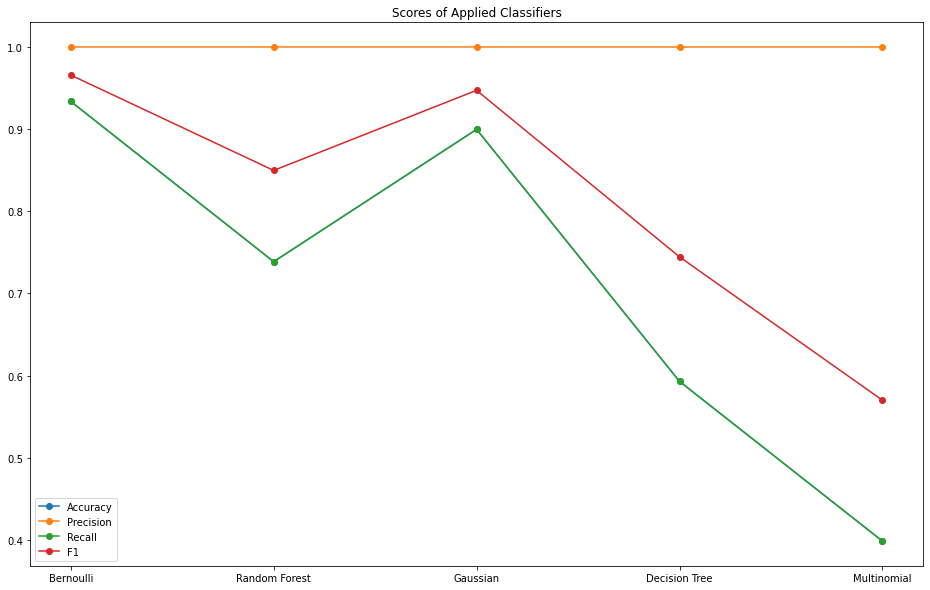

In [176]:
plt.figure(figsize=(16,10))
#plot 1:
x1 = np.array(['Bernoulli', 'Random Forest', 'Gaussian', 'Decision Tree', 'Multinomial'])
y1 = np.array([b_accuracy, r_accuracy, g_accuracy, d_accuracy, m_accuracy])
plt.plot(x1,y1, marker = 'o', label='Accuracy')

#plot 2:
x1 = np.array(['Bernoulli', 'Random Forest', 'Gaussian', 'Decision Tree', 'Multinomial'])
y1 = np.array([b_precision, r_precision, g_precision, d_precision, m_precision])
plt.plot(x1,y1, marker = 'o', label='Precision')

#plot 3:
x1 = np.array(['Bernoulli', 'Random Forest', 'Gaussian', 'Decision Tree', 'Multinomial'])
y1 = np.array([b_recall, r_recall, g_recall, d_recall, m_recall])
plt.plot(x1,y1, marker = 'o', label='Recall')

#plot 4:
x1 = np.array(['Bernoulli', 'Random Forest', 'Gaussian', 'Decision Tree', 'Multinomial'])
y1 = np.array([b_f1, r_f1, g_f1, d_f1, m_f1])
plt.plot(x1,y1, marker = 'o', label='F1')

plt.title("Scores of Applied Classifiers")
plt.legend()
plt.show()

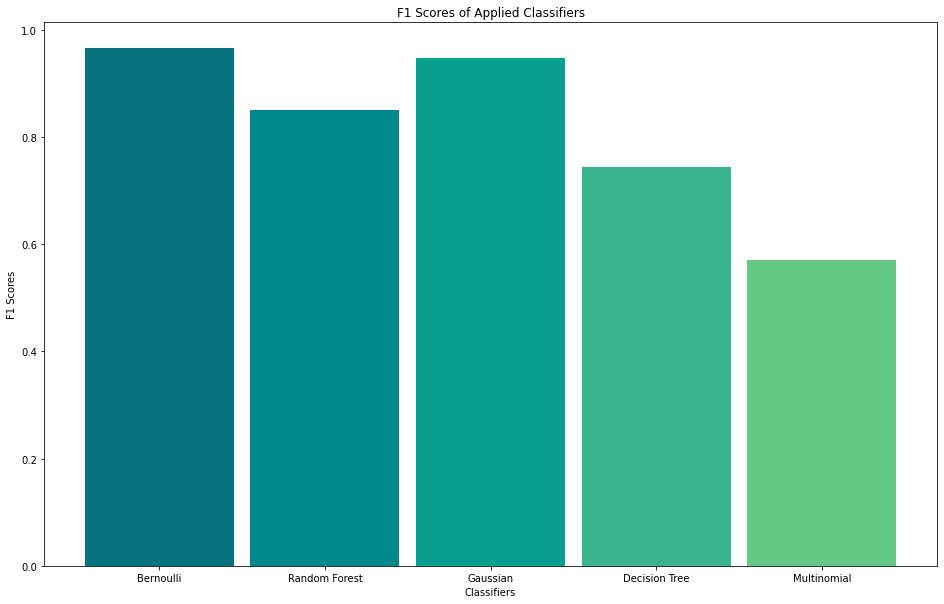

In [177]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]
 
plt.figure(figsize=(16,10))
# heights of bars
height = [b_f1, r_f1, g_f1, d_f1, m_f1]
 
# labels for bars
tick_label = ['Bernoulli', 'Random Forest', 'Gaussian', 'Decision Tree', 'Multinomial']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label, width = 0.9, color = ['#08737f', '#00898a', '#089f8f', '#39b48e', '#64c987'])
 
# naming the x-axis
plt.xlabel('Classifiers')
# naming the y-axis
plt.ylabel('F1 Scores')
# plot title
plt.title('F1 Scores of Applied Classifiers')
 
# function to show the plot
plt.show()

In [121]:
np.unique(Y_mpred)

array([0, 1])

In [134]:
# rdf = pd.DataFrame(Y_mpred, columns=['loan_default'], index = X_test.index)
# rdf

,loan_default
7000,1
7001,1
7002,0
7003,1
7004,1
...,...
9995,0
9996,1
9997,1
9998,1


In [135]:
# rdf.to_csv('SubmissionM2.csv')